In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv(r"D:\ML\Data Science\Real Estate Price Prediction\Dataset.csv")

In [3]:
DF.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
DF.groupby("society")["society"].agg('count').head()

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
Name: society, dtype: int64

In [5]:
DF2 = DF.drop(["availability", "society"], axis = 'columns')

In [6]:
DF2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
DF2.shape


(13320, 7)

In [8]:
DF2.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
DF2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
DF3 = DF2.dropna()

In [11]:
DF3.shape

(12710, 7)

In [12]:
DF3['Bedrooms'] = DF3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-1c3b8bc79b3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF3['Bedrooms'] = DF3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
DF3.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
DF3.drop('size', axis = 'columns').head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
DF3.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [16]:
def is_float(x):
    try: 
        float(x)
        return True
    except: 
        return False
        

In [17]:
DF3[~DF3['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [18]:
def convert_to_float(x):
    temp = x.split('-')
    if len(temp) == 2:
        return(float(temp[0]) + float(temp[1]))/2
    try: return float(x)
    except: return None 

In [19]:
DF3.describe()

,bath,balcony,price,Bedrooms
count,12710.000000,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778,2.737136
std,1.226000,0.817287,131.766089,1.205097
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,49.030000,2.000000
50%,2.000000,2.000000,70.000000,3.000000
75%,3.000000,2.000000,115.000000,3.000000
max,40.000000,3.000000,2912.000000,43.000000


In [20]:
DF4 = DF3.copy()

In [21]:
DF4['total_sqft'] = DF4['total_sqft'].apply(convert_to_float)

In [22]:
DF4.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Super built-up Area,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [23]:
DF4.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
DF4.head()

,area_type,location,size,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [25]:
DF5 = DF4.drop("size", axis = 'columns')

In [26]:
len(DF5.groupby('location')['location'].agg('count').sort_values(ascending = False))

1265

In [27]:
Location_stats = DF5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [28]:
Location_stats_Less_10 = Location_stats[Location_stats<=10]
DF6 = DF5.copy()

In [29]:
DF6['location'] = DF5['location'].apply(lambda x: x.strip())

In [30]:
DF6['location'] = DF5['location'].apply(lambda x: 'other' if x in Location_stats_Less_10 else x)

In [31]:
len(DF6.location.unique())

238

In [32]:
len(DF6.location.unique())

238

In [33]:
DF6.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
other                   2754
Whitefield               514
Sarjapur  Road           372
Electronic City          300
Kanakpura Road           261
                        ... 
Pattandur Agrahara        11
Vishveshwarya Layout      11
Banjara Layout            11
Mico Layout               11
Doddaballapur             11
Name: location, Length: 238, dtype: int64

In [34]:
DF5.groupby('balcony')['balcony'].agg('count').sort_values(ascending = False)

balcony
2.0    5112
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [35]:
DF6.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [36]:
DF6['Price_per_sqft'] = DF6['price']*100000/ DF5['total_sqft']

In [37]:
DF6.head()
DF6.shape

(12710, 8)

In [38]:
DF6[DF6['total_sqft']/DF6.Bedrooms<300].head(6)

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
119,Plot Area,Hennur Road,276.0,3.0,3.0,23.0,2,8333.333333


In [39]:
DF7 = DF6[DF6['total_sqft']/DF5.Bedrooms>300]

In [40]:
DF7.shape

(11847, 8)

In [41]:
DF7.shape

(11847, 8)

In [42]:
DF7.shape

(11847, 8)

In [43]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        red_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,red_df], ignore_index = True)
    return df_out

In [44]:
DF8 = remove_pps_outlier(DF6)

In [45]:
DF8.shape

(10821, 8)

In [46]:
DF8.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft
0,Super built-up Area,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509


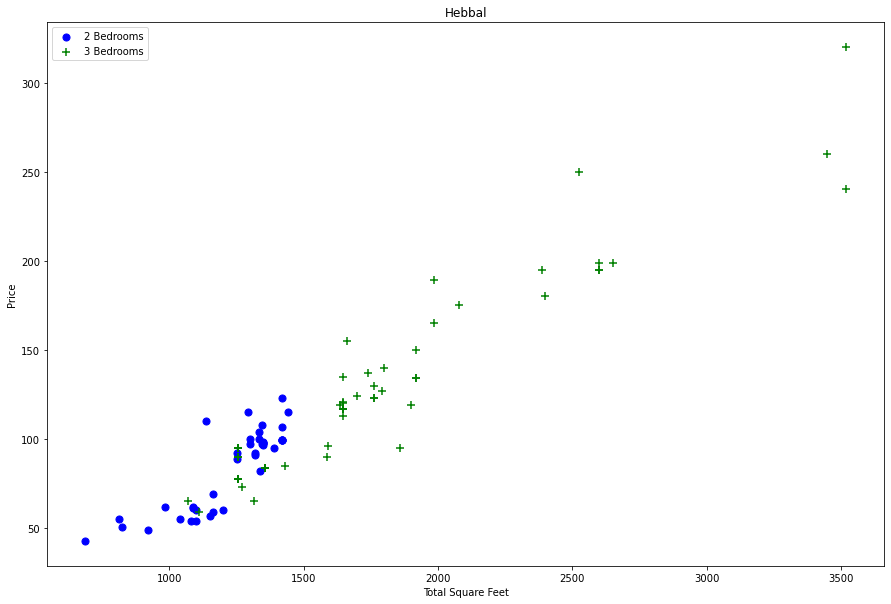

In [47]:
def plot_scatter_graph(df,location):
    bhk2 = df[(df.location == location) & (df.Bedrooms == 2)]
    bhk3 = df[(df.location == location) & (df.Bedrooms == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 Bedrooms', s = 50 )
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'Green', label = '3 Bedrooms', s = 50 )
    plt.xlabel('Total Square Feet')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

     
plot_scatter_graph(DF8,"Hebbal")

In [48]:
 DF8['bhk'] = DF8['Bedrooms'] 
 DF8.head()


,area_type,location,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft,bhk
0,Super built-up Area,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000,3
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,3


In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([]) 
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                
                'mean' : np.mean(bhk_df.Price_per_sqft),
                'std'  : np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
                }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
               
                if stats and stats['count']>5:
                    exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

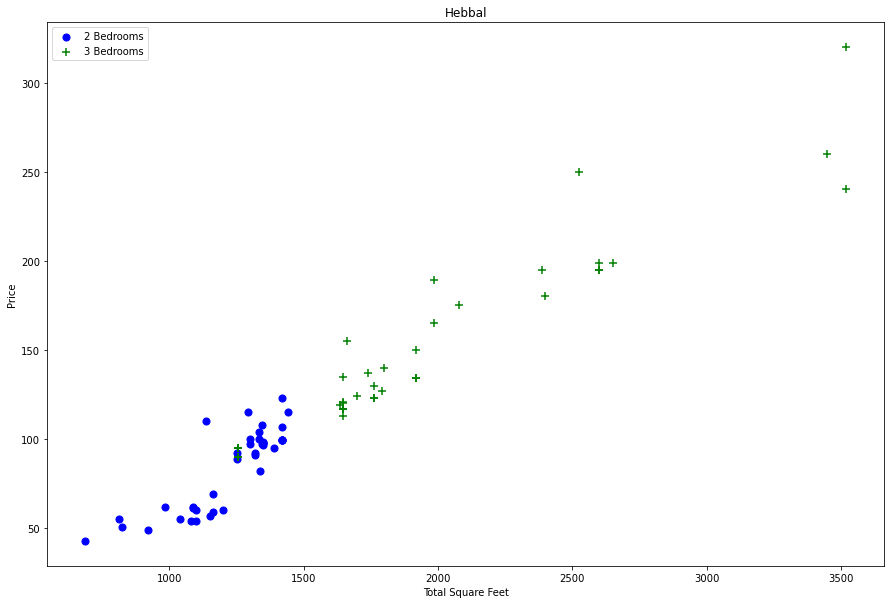

In [50]:
DF9 = remove_bhk_outliers(DF8)
plot_scatter_graph(DF9,"Hebbal")

Text(0, 0.5, 'Numbers')

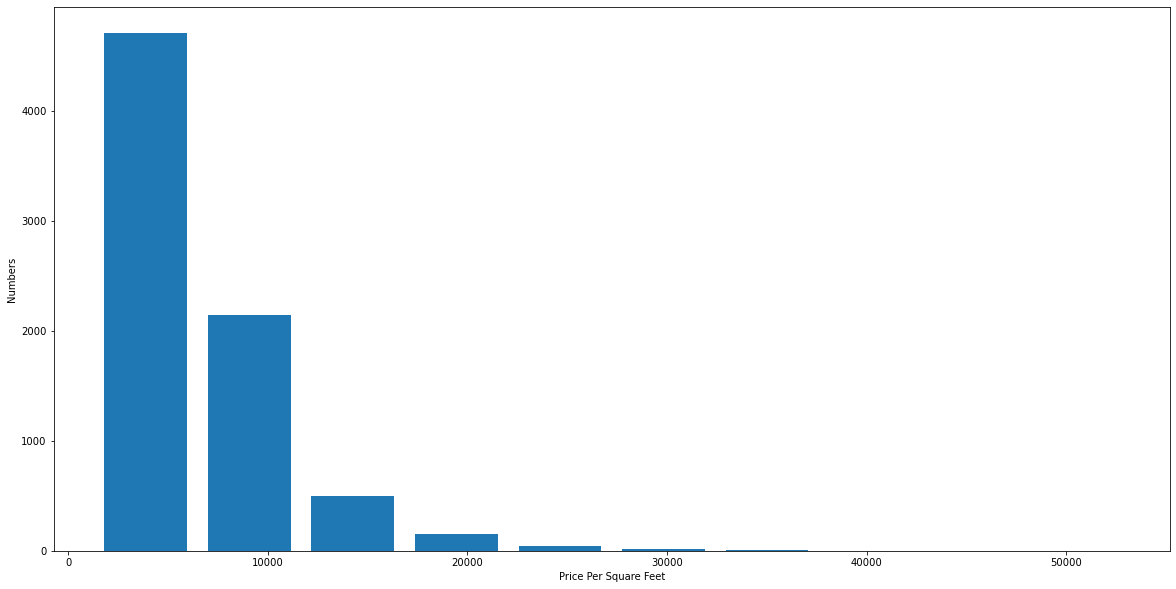

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(DF9.Price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Numbers")

In [52]:
DF10 = DF9[DF9.bath<DF9.bhk+2]

In [53]:
dummies = pd.get_dummies(DF10.location)

In [54]:
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
DF10.shape

(7489, 9)

In [56]:
DF10.head()

,area_type,location,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft,bhk
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509,3
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699,2


In [57]:
DF11 = DF10.drop('area_type', axis = 'columns')

In [58]:
DF12 = pd.concat([DF11, dummies.drop('other' , axis = 'columns')],axis = 'columns')

In [59]:
DF13 = DF12.drop('location', axis = 'columns')

In [60]:
DF13.shape

(7489, 244)

In [61]:
DF13.drop(['Price_per_sqft' , 'balcony'] , axis = 'columns')
DF13.head()


,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,3200.000000,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,6916.666667,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,3418.803419,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,4561.403509,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,4540.654699,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
DF13.head(117)

,total_sqft,bath,balcony,price,Bedrooms,Price_per_sqft,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.00,2,3200.000000,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.00,2,6916.666667,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.00,2,3418.803419,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.00,3,4561.403509,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.00,2,4540.654699,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1190.0,2.0,1.0,49.98,2,4200.000000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,1420.0,2.0,2.0,96.00,3,6760.563380,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,1680.0,3.0,2.0,120.00,3,7142.857143,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,980.0,2.0,2.0,69.00,2,7040.816327,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = DF13.drop('price' , axis = 'columns')
y = DF13.price


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 11 )

In [109]:
from sklearn.tree import DecisionTreeRegressor
RT = LinearRegression()
RT.fit(X_train, y_train)
RT.score(X_test, y_test)

0.8981681970917994

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [105]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(DecisionTreeRegressor() , X, y, cv=cv)

array([0.95462783, 0.96104649, 0.93558337, 0.95984964, 0.96237113])

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }  
            },
            
        'lasso' : {
            'model' : Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection': ['random' , 'cyclic']
                }
                
            },
        
        'Decision Tree': {
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
            
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'] ,config['params'], cv = cv ,return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best score' : gs.best_score_,
            'best params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns = ['model','best score', 'best params'])
    

In [93]:
find_best_model(X,y)

,model,best score,best params
0,linear_regression,0.855841,{'normalize': False}
1,lasso,0.846974,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree,0.940309,"{'criterion': 'mse', 'splitter': 'best'}"


In [71]:
X.columns


Index(['total_sqft', 'bath', 'balcony', 'Bedrooms', 'Price_per_sqft', 'bhk',
       ' Devarachikkanahalli', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [110]:
def predict_price(loc, total_sqft, bath, Bedrooms):
    loc_index = np.where(X.columns==loc)[0][0]
    
    print(loc_index)
    
    x=np.zeros(len(X.columns))
    print(x)
    x[0] = total_sqft
    x[1] = bath
    x[2] = Bedrooms
    
    if loc_index >=0:
        x[loc_index] = 1
        
    return RT.predict([x])[0]
    

In [115]:
predict_price('Indira Nagar',1000,2,2)

117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


-76.9940593750575